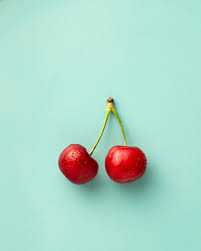

In [ ]:
import cv2
from IPython.display import display
from PIL import Image

# Load the image
image = cv2.imread('/content/download.jpg')

# Compress and save as JPEG with quality = 50 (lower means more compression)
jpeg_path = 'compressed_image.jpg'
cv2.imwrite(jpeg_path, image, [cv2.IMWRITE_JPEG_QUALITY, 50])

# Display the compressed JPEG image
display(Image.open(jpeg_path))


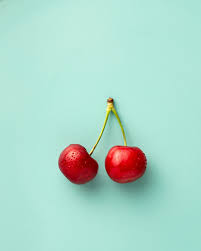

In [ ]:
from PIL import Image

# Open the image
image = Image.open('/content/download.jpg')

# Save as PNG with maximum compression level
png_path = 'compressed_image.png'
image.save(png_path, format='PNG', optimize=True, compress_level=9)

# Display the compressed PNG image
display(Image.open(png_path))


task-2


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8659 - loss: 0.4341 - val_accuracy: 0.9803 - val_loss: 0.0601
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9835 - loss: 0.0522 - val_accuracy: 0.9850 - val_loss: 0.0481
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9884 - loss: 0.0377 - val_accuracy: 0.9901 - val_loss: 0.0291
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9921 - loss: 0.0257 - val_accuracy: 0.9905 - val_loss: 0.0275
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9936 - loss: 0.0203 - val_accuracy: 0.9913 - val_loss: 0.0275
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9949 - loss: 0.0146 - val_accuracy: 0.9910 - val_loss: 0.0294
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9897 - val_loss: 0.0386
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9962 - loss: 0.0115 - val_accuracy: 0

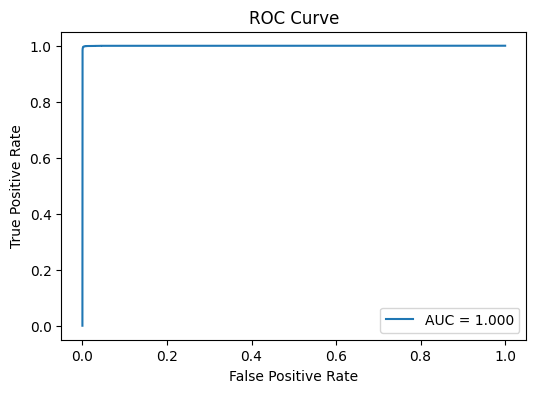

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train_cat, epochs=50, batch_size=64, validation_data=(x_test, y_test_cat))

# Evaluate model
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Compute ROC and AUC
y_test_bin = to_categorical(y_test, 10)
y_pred_prob = model.predict(x_test)

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3297 - loss: 1.8020 - val_accuracy: 0.4976 - val_loss: 1.3653
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5653 - loss: 1.2237 - val_accuracy: 0.6256 - val_loss: 1.0676
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6417 - loss: 1.0225 - val_accuracy: 0.6366 - val_loss: 1.0456
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6754 - loss: 0.9227 - val_accuracy: 0.6771 - val_loss: 0.9309
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7118 - loss: 0.8219 - val_accuracy: 0.6724 - val_loss: 0.9420
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7349 - loss: 0.7582 - val_accuracy: 0.7064 - val_loss: 0.8573
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7556 - loss: 0.7006 - val_accuracy: 0.6977 - val_loss: 0.9045
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7770 - loss: 0.6402 - val_accuracy: 0.

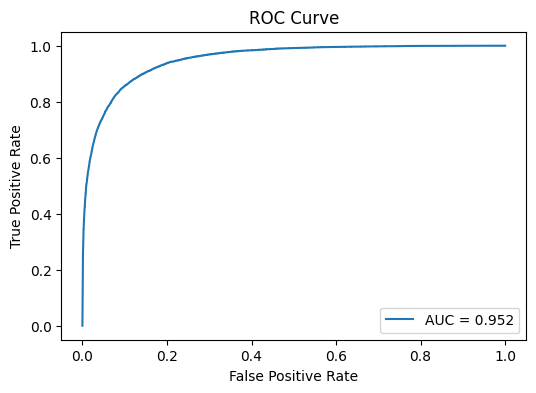

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train_cat, epochs=50, batch_size=64, validation_data=(x_test, y_test_cat))

# Evaluate model
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Compute ROC and AUC
y_test_bin = to_categorical(y_test, 10)
y_pred_prob = model.predict(x_test)

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
